## 1. 필요한 모듈 임포트

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt    
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 2. 데이터 볼러오기, 살펴보기

https://www.kaggle.com/datasets/saramah/loan-data/data

In [2]:
df = pd.read_csv('loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


credit.policy: 고객의 신용 심사기준 충족 여부(landingclub.com의 신용 기준)

purpose:대출 목적
(all_other: 기타, 
credit_card: 신용카드 청구액 결재 목적, 
debt_consolidation: 다른 부채 상환 목적,
educational : 교육 관련 비용 목적,
home_improvement : 주택 개량 목적,
major_purchase : 높은 비용의 상품 구매 목적 ex. 자동차, 결혼식, 
small_business : 소규모 사업 자금 목적)

int.rate : 대출 이자율(개인별로 위험하다고 판단한 채용자에게는 더 높은 이자율이 할당됨)

installment : 할부금 (차용인이 지불해야할 월별 할부금)

log.annual.inc: 차용인의 연간소득 자연로그값

dti : 차용인의 소득대비 부채 비율(부채금액 / 연간소득)

fico : 차용인의 FICO 신용점수 

days.with.cr.line : 차용인의 신용한도 유지 일수

revol.bal : 차용인의 신용카드 미지급 총액

revol.util : 신용 한도 이용률(총 신용 가능 금액 대비 사용된 신용 한도 금액)

inq.last.6mths : 지난 6개월동안 채권자가 차용인에게 문의한 횟수

delinq.2yrs : 지난 2년동안 차용인이 지불기한 30일 이상 연체한 횟수

pub.rec : 차용인의 감점 기록수(파산 신청, 세금 채권 or 판결)

not.fully.paid : 차용인의 미납 여부 (target data) (1: 완납, 0: 완납되지않음)

각 속성들의 분포

In [3]:
df.describe().round(4)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.0000,9578.0000,9578.0000,9578.0000,9578.0000,9578.0000,9578.0000,9.578000e+03,9578.0000,9578.0000,9578.0000,9578.0000,9578.0000
mean,0.8050,0.1226,319.0894,10.9321,12.6067,710.8463,4560.7672,1.691396e+04,46.7992,1.5775,0.1637,0.0621,0.1601
std,0.3962,0.0268,207.0713,0.6148,6.8840,37.9705,2496.9304,3.375619e+04,29.0144,2.2002,0.5462,0.2621,0.3667
min,0.0000,0.0600,15.6700,7.5475,0.0000,612.0000,178.9583,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.0000,0.1039,163.7700,10.5584,7.2125,682.0000,2820.0000,3.187000e+03,22.6000,0.0000,0.0000,0.0000,0.0000
50%,1.0000,0.1221,268.9500,10.9289,12.6650,707.0000,4139.9583,8.596000e+03,46.3000,1.0000,0.0000,0.0000,0.0000
75%,1.0000,0.1407,432.7625,11.2913,17.9500,737.0000,5730.0000,1.824950e+04,70.9000,2.0000,0.0000,0.0000,0.0000
max,1.0000,0.2164,940.1400,14.5284,29.9600,827.0000,17639.9583,1.207359e+06,119.0000,33.0000,13.0000,5.0000,1.0000


## 3. 데이터 전처리(결측값처리, 범주형 데이터 인코딩)

### 결측값 처리

In [4]:
# 결측값 없기 때문에 처리하지 않음
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### 범주형 데이터 인코딩

purpose 속성 데이터가 범주형 데이터 이므로, 
정수형 데이터로 변환


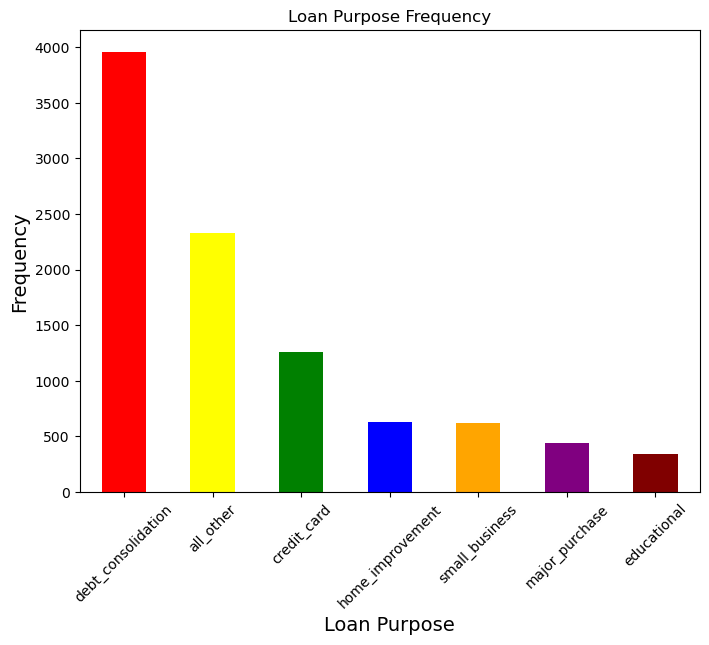

In [5]:
purpose_value_counts = df['purpose'].value_counts()

plt.figure(figsize=(8,6)) #adjusting figure size
purpose_value_counts.plot(kind='bar', color = ['red','yellow', 'green', 'blue','orange','purple','maroon'])
plt.title("Loan Purpose Frequency")
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.xticks(rotation=45)
#plt.grid()
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_purpose = le.fit_transform(df['purpose'])
df['purpose'] = encoded_purpose
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


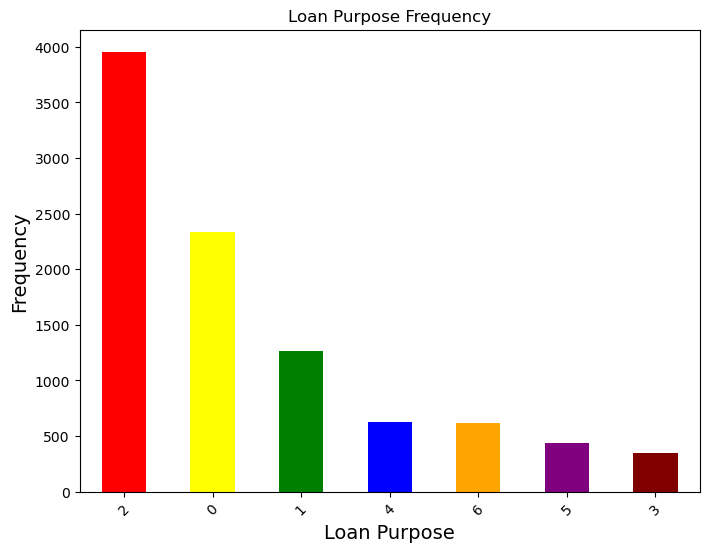

In [7]:
purpose_value_counts = df['purpose'].value_counts()

plt.figure(figsize=(8,6)) #adjusting figure size
purpose_value_counts.plot(kind='bar', color = ['red','yellow', 'green', 'blue','orange','purple','maroon'])
plt.title("Loan Purpose Frequency")
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.xticks(rotation=45)
#plt.grid()
plt.show()

## 4. 데이터 분할하기 (x,y), (훈련세트, 테스트세트)

In [8]:
X, y = df.drop(labels="not.fully.paid", axis=1), df["not.fully.paid"]

In [9]:
from sklearn.model_selection import train_test_split

def train_val_test_split(X,y, test_size, random_state, stratify):
    # 훈련 데이터셋와 나머지로 나눔
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=stratify)

    # 나머지를 검증 데이터셋와 테스트 데이터셋으로 나눔
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X,y, test_size=0.4, random_state=42, stratify=y)

## 5. 기본 모델링 및 성능 평가

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
print("train set score:", accuracy_score(y_train, lr.predict(X_train)))
print("val set score:", accuracy_score(y_val, lr.predict(X_val)))

train set score: 0.8402366863905325
val set score: 0.8413361169102297


## 6. 데이터 전처리2 (표준화, 속성선택, PCA)및 성능 향상 정도 평가

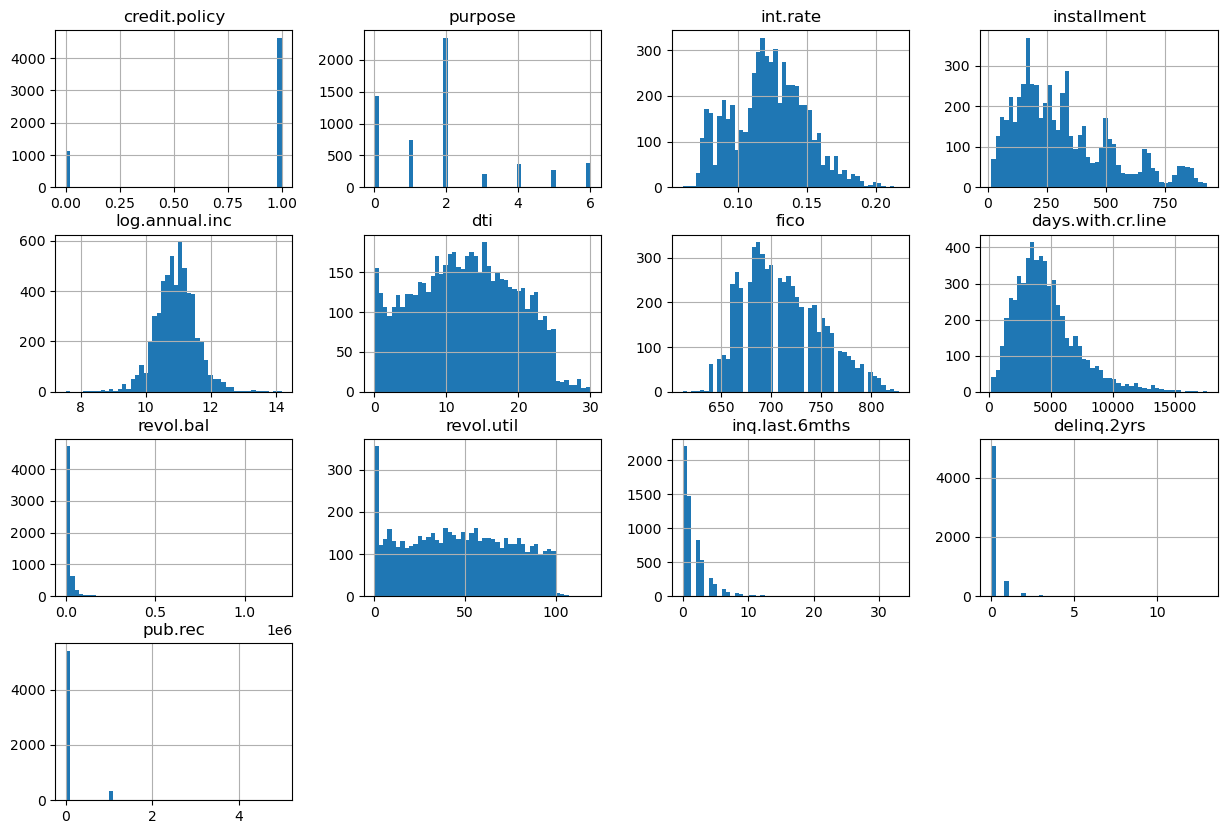

In [11]:
X_train.hist(bins=50, figsize=(15, 10))
plt.show()

기존 데이터를 

표준화 (O/X), 

y데이터와 상관관계 높은 속성만 선택 (O/X), 

PCA (O/X)등

을 진행 하여 최적의 데이터셋으로 전처리 진행 

### 표준화( StandardScaling)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)
X_test_std = sc.transform(X_test)

In [13]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_std, y_train)
print('train set score:',accuracy_score(y_train, lr.predict(X_train_std)))
print('val set score:',accuracy_score(y_val, lr.predict(X_val_std)))

train set score: 0.8390184476157326
val set score: 0.8423799582463466


약 84.1% -> 약 84.2%로 성능 향상

### 속성 선택(feature selection)

In [14]:
df_train = X_train
df_train['y'] = y_train

corr = df_train.corr().round(4)
corr

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,y
credit.policy,1.0000,0.0185,-0.2969,0.0651,0.0363,-0.0991,0.3475,0.0868,-0.1935,-0.1045,-0.5386,-0.0798,-0.0559,-0.1635
purpose,0.0185,1.0000,0.1208,0.1594,0.0784,-0.0516,0.0643,0.0511,0.0508,-0.0616,0.0320,-0.0123,0.0023,0.0440
int.rate,-0.2969,0.1208,1.0000,0.2674,0.0411,0.2333,-0.7072,-0.1274,0.0993,0.4745,0.2025,0.1457,0.0935,0.1578
installment,0.0651,0.1594,0.2674,1.0000,0.4446,0.0639,0.0896,0.1909,0.2343,0.0862,-0.0098,-0.0150,-0.0291,0.0475
log.annual.inc,0.0363,0.0784,0.0411,0.4446,1.0000,-0.0495,0.1240,0.3404,0.3640,0.0607,0.0467,0.0210,0.0144,-0.0282
dti,-0.0991,-0.0516,0.2333,0.0639,-0.0495,1.0000,-0.2466,0.0613,0.1879,0.3449,0.0360,-0.0287,-0.0038,0.0412
fico,0.3475,0.0643,-0.7072,0.0896,0.1240,-0.2466,1.0000,0.2684,-0.0183,-0.5496,-0.1831,-0.2181,-0.1462,-0.1417
days.with.cr.line,0.0868,0.0511,-0.1274,0.1909,0.3404,0.0613,0.2684,1.0000,0.2229,-0.0258,-0.0296,0.0673,0.0673,-0.0168
revol.bal,-0.1935,0.0508,0.0993,0.2343,0.3640,0.1879,-0.0183,0.2229,1.0000,0.2050,0.0396,-0.0279,-0.0393,0.0538
revol.util,-0.1045,-0.0616,0.4745,0.0862,0.0607,0.3449,-0.5496,-0.0258,0.2050,1.0000,-0.0122,-0.0394,0.0709,0.0861


In [15]:
# y와 다른 컬럼들의 상관계수 계산
correlation_with_y = df_train.corr()["y"].drop("y")

# 내림차순으로 정렬
sorted_correlation = correlation_with_y.sort_values(ascending=False)
sorted_correlation

inq.last.6mths       0.165075
int.rate             0.157846
revol.util           0.086118
revol.bal            0.053835
installment          0.047463
pub.rec              0.045309
purpose              0.044028
dti                  0.041177
delinq.2yrs          0.009925
days.with.cr.line   -0.016766
log.annual.inc      -0.028238
fico                -0.141710
credit.policy       -0.163493
Name: y, dtype: float64

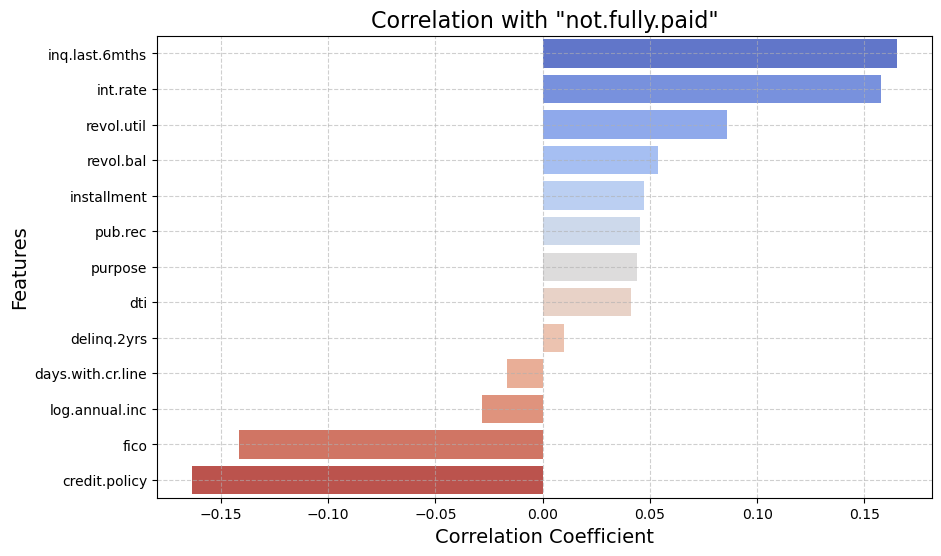

In [16]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlation.values, y=sorted_correlation.index, palette="coolwarm")

# 그래프 제목과 레이블 추가
plt.title('Correlation with "not.fully.paid"', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

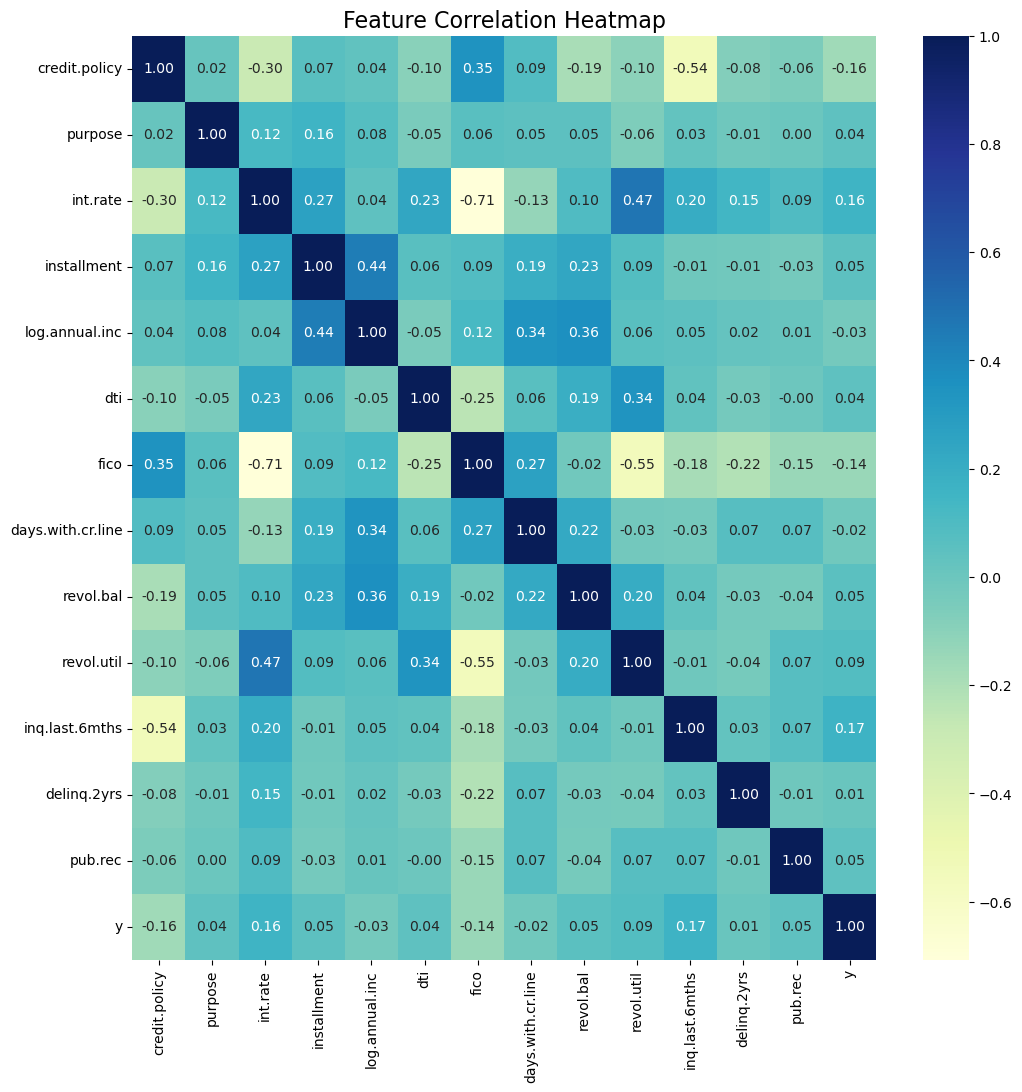

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

y값과 0.05이상의 상관계수를 보이는 [int.rate, inq.last.6mths,revol.util, revol.bal, fico, credit.policy]의 속성만을 선택하여 새로운 데이터 만들기

In [18]:
selected_features = ["credit.policy", "int.rate", "fico", "inq.last.6mths", "revol.util", "revol.bal"]

In [19]:
X_train_sel = X_train[selected_features]
X_val_sel = X_val[selected_features]

In [20]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_sel, y_train)

print("train set score:", accuracy_score(y_train, lr.predict(X_train_sel)))
print("validation set score:", accuracy_score(y_val, lr.predict(X_val_sel)))

train set score: 0.8378002088409329
validation set score: 0.8387265135699373


In [21]:
sc = StandardScaler()
X_train_sel_std = sc.fit_transform(X_train_sel)
X_val_sel_std = sc.transform(X_val_sel)

lr = LogisticRegression(random_state=42)
lr.fit(X_train_sel_std, y_train)

print("train set score:", accuracy_score(y_train, lr.predict(X_train_sel_std)))
print("validation set score:", accuracy_score(y_val, lr.predict(X_val_sel_std)))

train set score: 0.838844413505047
validation set score: 0.8376826722338204


표준화만 진행했을 때의 로지스틱 회귀 정확도(0.8424) 

주요 6개의 속성 선택 데이터셋의 로지스틱 회귀 정확도(0.8387)

표준화 + 주요 6개의 속성 선택 데이터셋의 로지스틱 회귀 정확도(0.8377)

->표준화만 진행한 데이터의 성능이 가장 좋음

-> 모든 속성을 사용

### 각 속성선택 별 지표 비교

In [22]:
# 1. 표준화만 진행
lr_std = LogisticRegression(random_state=42)
lr_std.fit(X_train_std, y_train)

train_acc_std = accuracy_score(y_train, lr_std.predict(X_train_std))
val_acc_std = accuracy_score(y_val, lr_std.predict(X_val_std))

# 2. 속성 선택만 진행
lr_sel = LogisticRegression(random_state=42)
lr_sel.fit(X_train_sel, y_train)

train_acc_sel = accuracy_score(y_train, lr_sel.predict(X_train_sel))
val_acc_sel = accuracy_score(y_val, lr_sel.predict(X_val_sel))

# 3. 둘 다 진행
lr_both = LogisticRegression(random_state=42)
lr_both.fit(X_train_sel_std, y_train)

train_acc_both = accuracy_score(y_train, lr_both.predict(X_train_sel_std))
val_acc_both = accuracy_score(y_val, lr_both.predict(X_val_sel_std))

Accuracy Scores:
1. Standardization only - Train: 0.8390, val: 0.8424
2. Feature selection only - Train: 0.8378, val: 0.8387
3. Both Standardization and Feature selection - Train: 0.8388, val: 0.8377


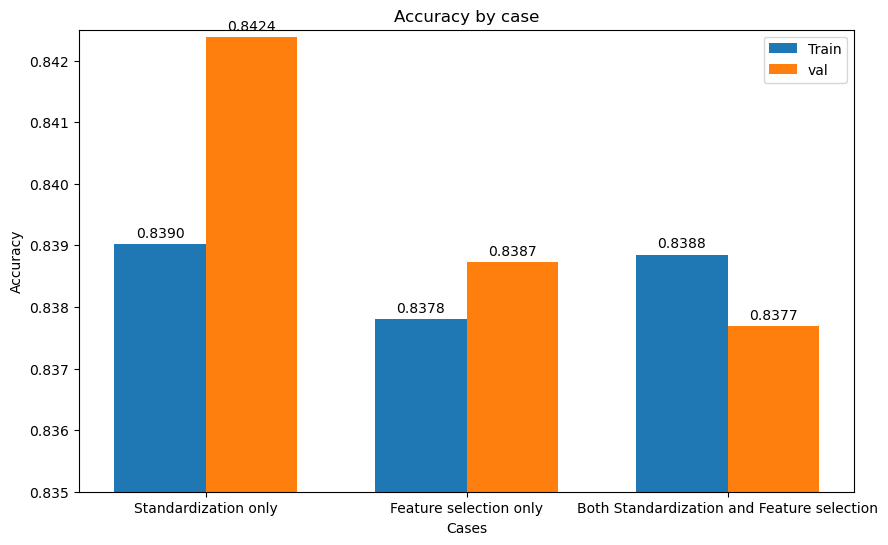

In [25]:
# 정확도 출력
print("Accuracy Scores:")
print(f"1. Standardization only - Train: {train_acc_std:.4f}, val: {val_acc_std:.4f}")
print(f"2. Feature selection only - Train: {train_acc_sel:.4f}, val: {val_acc_sel:.4f}")
print(f"3. Both Standardization and Feature selection - Train: {train_acc_both:.4f}, val: {val_acc_both:.4f}")

# 성능 시각화
cases = ['Standardization only', 'Feature selection only', 'Both Standardization and Feature selection']
train_scores = [train_acc_std, train_acc_sel, train_acc_both]
val_scores = [val_acc_std, val_acc_sel, val_acc_both]

x = np.arange(len(cases))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, val_scores, width, label='val')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Cases')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by case')
ax.set_xticks(x)
ax.set_xticklabels(cases)
ax.legend()

# Add accuracy labels with precision
def autolabel(rects, precision):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.{precision}f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, 4)
autolabel(rects2, 4)

plt.ylim([0.835, 0.8425])  # Set y-axis limit from 0.838 to 0.8401
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)
X_test_std = sc.transform(X_test)

### PCA(Principal Component Analysis)

In [26]:
from sklearn.decomposition import PCA
accuracy_scores = []
for i in range(1,13):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train_std)
    X_val_pca = pca.transform(X_val_std)
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train_pca, y_train)
    accuracy = accuracy_score(y_val, lr.predict(X_val_pca))
    accuracy_scores.append(accuracy)
    print(accuracy)

0.8387265135699373
0.8387265135699373
0.8397703549060542
0.8387265135699373
0.8397703549060542
0.8408141962421712
0.8413361169102297
0.8413361169102297
0.8402922755741128
0.8418580375782881
0.8418580375782881
0.8413361169102297


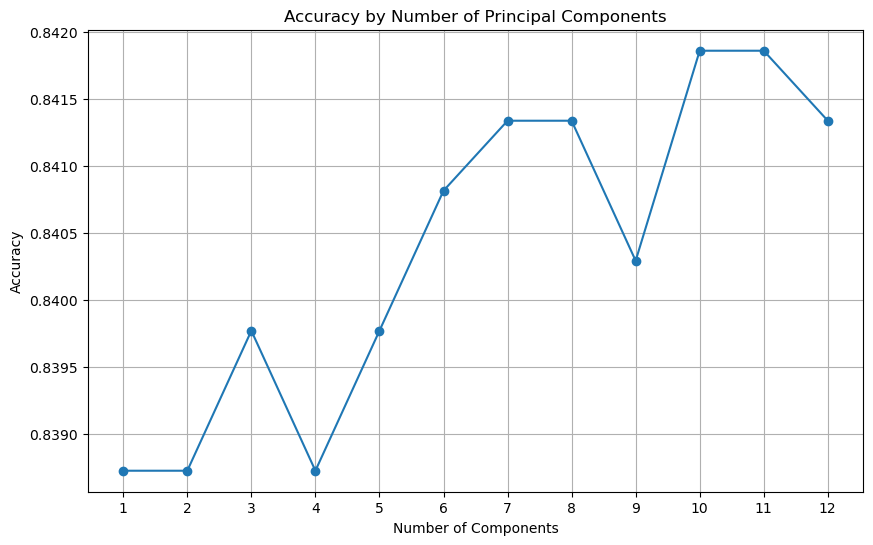

In [27]:
# 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1,13), accuracy_scores, marker='o')
plt.title('Accuracy by Number of Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

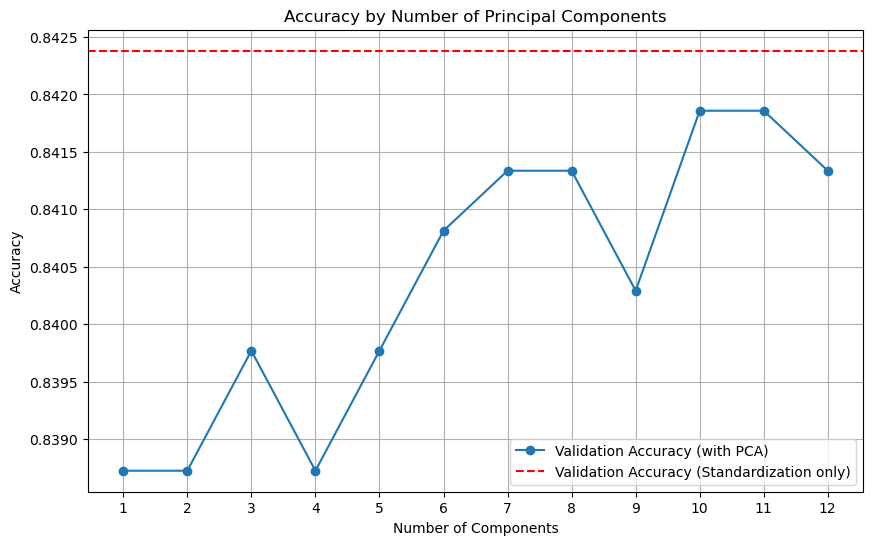

In [28]:
#표준화만 진행한거랑 비교
plt.figure(figsize=(10, 6))
plt.plot(range(1,13), accuracy_scores, marker='o', label='Validation Accuracy (with PCA)')
plt.axhline(y=val_acc_std, color='r', linestyle='--', label='Validation Accuracy (Standardization only)')
plt.title('Accuracy by Number of Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.xticks(range(1,13))
plt.grid(True)
plt.legend()
plt.show()

PCA진행해도 0.8424에서  더이상 성능 개선 X

#### 표준화만 진행한 데이터셋이 최적의 데이터셋이라고 판단

## 7. 모델 선택 - GridSearchCV(파라미터 튜닝)
GridSearchCV를 돌려보며 가장 높은 성능이 나오는 모델을 선택

로지스틱 회귀(Logistic Regression) 

의사 결정 트리 (DT)

서포트 벡터 머신(SVM)

K-NN 분류기

랜덤 포레스트

ada Boost 

In [30]:
best_models = []

**로지스틱 회귀(Logistic Regression)**

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # 규제 강도
}
lr = LogisticRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search.fit(X_train_std, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수:", grid_search.best_score_)

best_model_lr = grid_search.best_estimator_
best_models.append(best_model_lr)

# 검증 세트로 모델 평가
val_score = best_model_lr.score(X_val_std, y_val)
print("검증 세트 점수:", val_score)

최적 하이퍼파라미터: {'C': 0.001}
최고 교차 검증 점수: 0.8397145343777197
검증 세트 점수: 0.8387265135699373


**의사 결정 트리 (DT)**

In [32]:
from sklearn.tree import DecisionTreeClassifier 
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_std, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수:", grid_search.best_score_)

best_model_dt = grid_search.best_estimator_
best_models.append(best_model_dt)

# 검증 세트로 모델 평가
val_score = best_model_dt.score(X_val_std, y_val)
print("검증 세트 점수:", val_score)

최적 하이퍼파라미터: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 20}
최고 교차 검증 점수: 0.8245733530101791
검증 세트 점수: 0.8188935281837161


**서포트 벡터 머신(SVM)**

In [33]:
from sklearn.svm import SVC
svm_grid_params = {
    "C": [0.01, 0.1, 1.0, 10.0],
    "kernel": ["linear", "sigmoid", "rbf"],
    "gamma": ["scale", 0.1, 1],
}
svm=SVC()

# 표준화 버전
grid_search = GridSearchCV(svm, svm_grid_params, cv=5, n_jobs=-1)
grid_search.fit(X_train_std, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수:", grid_search.best_score_)

best_model_svm = grid_search.best_estimator_
best_models.append(best_model_svm)

# 검증 세트로 모델 평가
val_score = best_model_svm.score(X_val_std, y_val)
print("검증 세트 점수:", val_score)

최적 하이퍼파라미터: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
최고 교차 검증 점수: 0.8398885987815492
검증 세트 점수: 0.8397703549060542


**K-NN 분류기**

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_std, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수:", grid_search.best_score_)

best_model_knn = grid_search.best_estimator_
best_models.append(best_model_knn)

# 검증 세트로 모델 평가
val_score = best_model_knn.score(X_val_std, y_val)
print("검증 세트 점수:", val_score)

최적 하이퍼파라미터: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}
최고 교차 검증 점수: 0.8397143830173686
검증 세트 점수: 0.8366388308977035


**랜덤 포레스트**

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

param_grid = {
    'n_estimators': [100, 200, 300],  # 트리의 개수
    'max_depth': [None, 10, 20],        # 트리의 최대 깊이
}

forest = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=forest, 
                           param_grid=param_grid,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                            scoring="accuracy",
                           n_jobs=-1,)
grid_search.fit(X_train_std, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수:", grid_search.best_score_)

best_model_rf = grid_search.best_estimator_
best_models.append(best_model_rf)

# 검증 세트로 모델 평가
val_score = best_model_rf.score(X_val_std, y_val)
print("검증 세트 점수:", val_score)

최적 하이퍼파라미터: {'max_depth': None, 'n_estimators': 300}
최고 교차 검증 점수: 0.8391930979679874
검증 세트 점수: 0.8402922755741128


**ada Boost**

In [36]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = {
    'n_estimators' : [10, 50, 100, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
}
ada = AdaBoostClassifier(algorithm="SAMME")
grid_search = GridSearchCV(estimator = ada,
                            param_grid=param_grid,
                            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                            scoring="accuracy",
                           n_jobs=-1)
grid_search.fit(X_train_std, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수:", grid_search.best_score_)

best_model_adb = grid_search.best_estimator_
best_models.append(best_model_adb)

# 검증 세트로 모델 평가
val_score = best_model_adb.score(X_val_std, y_val)
print("검증 세트 점수:", val_score)

최적 하이퍼파라미터: {'learning_rate': 1.0, 'n_estimators': 500}
최고 교차 검증 점수: 0.8402365762288568
검증 세트 점수: 0.8402922755741128


In [37]:
model_accuracy = {}

for best_model in best_models:
    name = best_model.__class__.__name__
    val_score = best_model.score(X_val_std, y_val)
    model_accuracy[name] = val_score
    print(f"{name}: {val_score:.8f}".rjust(35))

     LogisticRegression: 0.83872651
 DecisionTreeClassifier: 0.81889353
                    SVC: 0.83977035
   KNeighborsClassifier: 0.83663883
 RandomForestClassifier: 0.84029228
     AdaBoostClassifier: 0.84029228


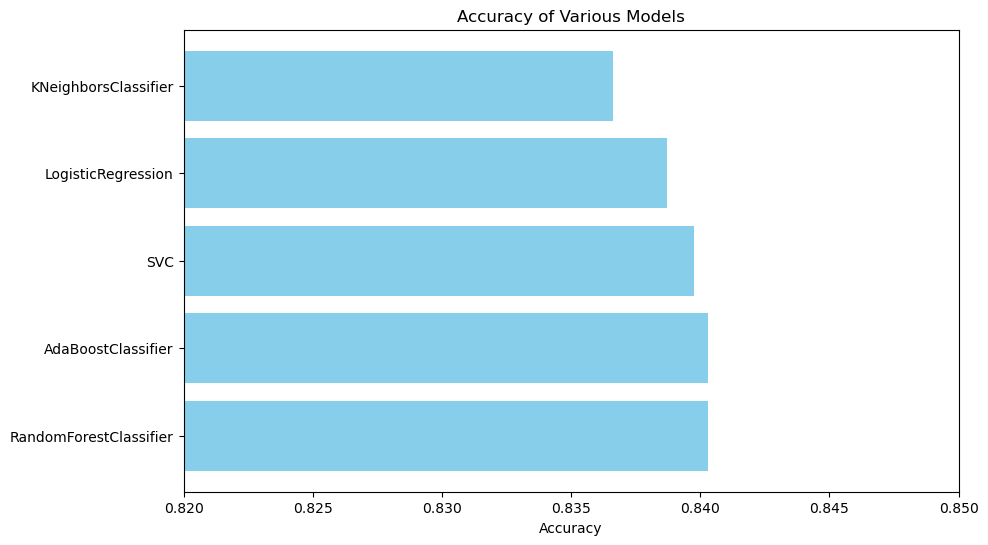

In [38]:
# 정확도가 0.82부터 0.85 사이인 모델만 선택
model_accuracy_filtered = {key: value for key, value in model_accuracy.items() if 0.82 <= value <= 0.85}

# 정확도를 기준으로 내림차순으로 정렬
sorted_model_accuracy = dict(sorted(model_accuracy_filtered.items(), key=lambda item: item[1], reverse=True))

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(list(sorted_model_accuracy.keys()), list(sorted_model_accuracy.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Various Models')
plt.xlim(0.82, 0.85)
plt.show()

## 8. 각종 평가지표로 평가
가장 뛰어난 성능을 보인 아다 부스트 모델로 평가지표 진행

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [40]:
adb = best_model_adb
y_pred = adb.predict(X_val_std)

In [41]:
print(f"accuracy: {accuracy_score(y_val, y_pred)}")
print(f"precision: {precision_score(y_val, y_pred)}")
print(f"recall: {recall_score(y_val, y_pred)}")
print(f"F1score: {f1_score(y_val, y_pred)}")

accuracy: 0.8402922755741128
precision: 0.5454545454545454
recall: 0.019543973941368076
F1score: 0.03773584905660377


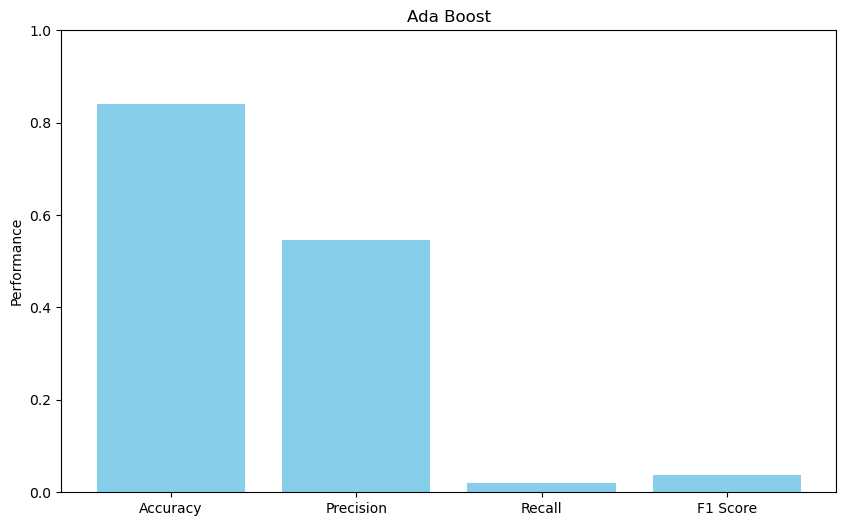

In [42]:
# 각 성능 지표를 저장
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1score = f1_score(y_val, y_pred)

# 성능 지표와 이름을 리스트에 저장
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1score]

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color='skyblue')
plt.ylabel('Performance')
plt.title('Ada Boost')
plt.ylim(0.0, 1.0)
plt.show()

recall과 F1score값이 매우 낮음

**ROC curve, AUC구하기**

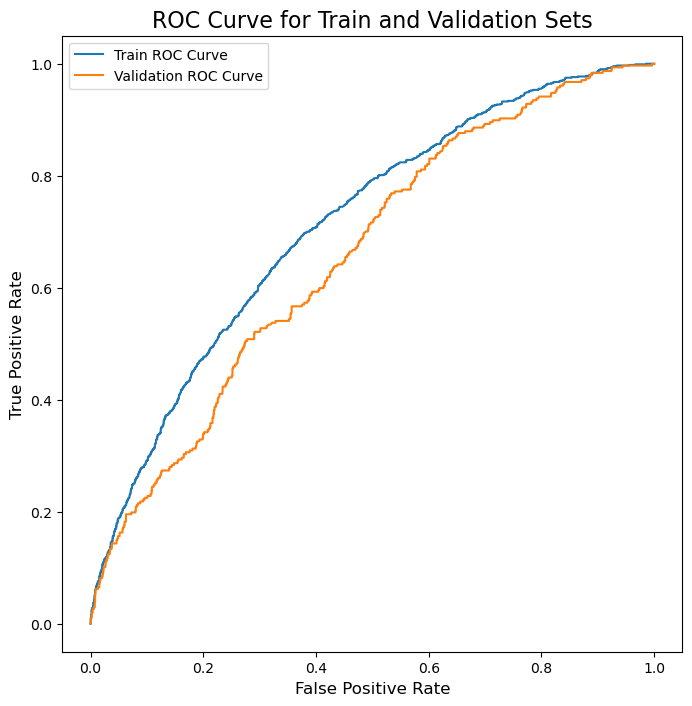

Train set AUC score: 0.712669
Validation set AUC score: 0.658443


In [43]:
from  sklearn.metrics import roc_curve, roc_auc_score, auc

score1 = adb.predict_proba(X_train_std)[:, 1]
score2 = adb.predict_proba(X_val_std)[:, 1]
fpr1, tpr1, _ = roc_curve(y_train, score1)
fpr2, tpr2, _ = roc_curve(y_val, score2)

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.plot(fpr1, tpr1, label='Train ROC Curve')
ax.plot(fpr2, tpr2, label='Validation ROC Curve')
ax.set_title('ROC Curve for Train and Validation Sets', fontsize=16)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend()
plt.show()

print('Train set AUC score: %f' % roc_auc_score(y_train, score1))
print('Validation set AUC score: %f' % roc_auc_score(y_val, score2))

정확도는 84%가 나오지만 recall, F1 score은 매우 낮은 모습

## 9. 데이터 불균형 파악

recall, F1 score이 매우 저조

-> 데이터 불균형 문제가 있다고 판단

-> y값이 [1,0] 이진형 데이터인데, 0의 값이 압도적으로 많아 불균형 발생

In [44]:
y.value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

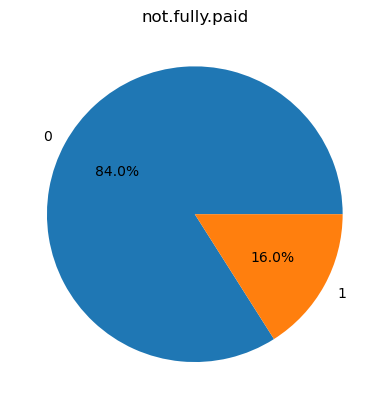

In [45]:
df['not.fully.paid'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('not.fully.paid')
plt.ylabel('')
plt.show()

데이터의 불균형을 해결하기위해 샘플링을 진행 

샘플링은 크게 두가지, over sampling & under sampling

각각의 샘플링 방법으로 진행 후, 성능 평가

## 10. 데이터 샘플링 이후, 성능 향상 정도 평가

### under sampling

In [46]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 다시 train, test, val 세트 나누기
(
    X_resampled_train,
    X_resampled_val,
    X_resampled_test,
    y_resampled_train,
    y_resampled_val,
    y_resampled_test,
) = train_val_test_split(
    X_resampled, y_resampled, test_size=0.4, random_state=42, stratify=y_resampled
)

# 표준화 진행
sc = StandardScaler()
sc.fit(X_resampled_train)
X_resampled_train_std = sc.transform(X_resampled_train)
X_resampled_val_std = sc.transform(X_resampled_val)
X_resampled_test_std = sc.transform(X_resampled_test)

print("Undersampling 후 클래스 분포:", np.bincount(y_resampled_train))

Undersampling 후 클래스 분포: [919 920]


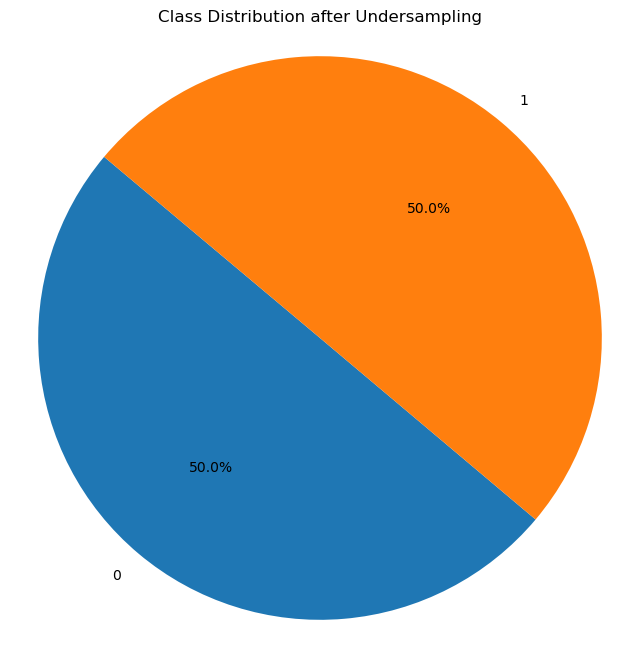

In [47]:
class_distribution = np.bincount(y_resampled_train)
labels = np.unique(y_resampled_train)
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Class Distribution after Undersampling')
plt.show()

가장 성능이 좋았던 아다부스트 모델로 under sampling데이터 성능 확인

In [48]:
print("std Train Accuracy: %f" % accuracy_score(y_resampled_train, adb.predict(X_resampled_train_std)))
print("std Validation Accuracy: %f" % accuracy_score(y_resampled_val, adb.predict(X_resampled_val_std)))

std Train Accuracy: 0.501903
std Validation Accuracy: 0.510604


In [49]:
print('accuracy: %f' % accuracy_score(y_resampled_val, adb.predict(X_resampled_val_std)))
print('precision: %f' % precision_score(y_resampled_val, adb.predict(X_resampled_val_std)))
print('recall: %f' % recall_score(y_resampled_val, adb.predict(X_resampled_val_std)))
print('F1score: %f' % f1_score(y_resampled_val, adb.predict(X_resampled_val_std)))

accuracy: 0.510604
precision: 0.875000
recall: 0.022876
F1score: 0.044586


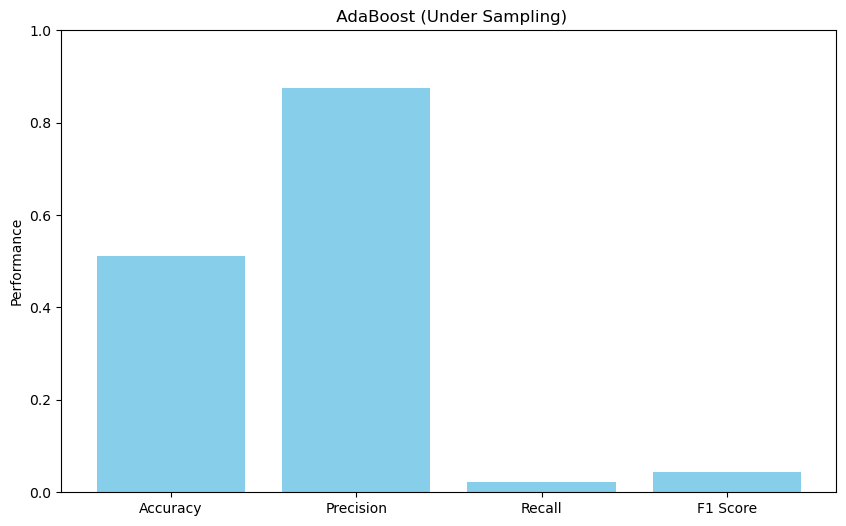

In [50]:
import matplotlib.pyplot as plt

# 각 성능 지표 계산
accuracy = accuracy_score(y_resampled_val, adb.predict(X_resampled_val_std))
precision = precision_score(y_resampled_val, adb.predict(X_resampled_val_std))
recall = recall_score(y_resampled_val, adb.predict(X_resampled_val_std))
f1score = f1_score(y_resampled_val, adb.predict(X_resampled_val_std))

# 시각화를 위해 성능 지표와 이름을 리스트에 저장
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1score]

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color='skyblue')
plt.ylabel('Performance')
plt.title(' AdaBoost (Under Sampling)')
plt.ylim(0.0, 1.0)
plt.show()


Text(0.5, 23.52222222222222, 'Predicted label')

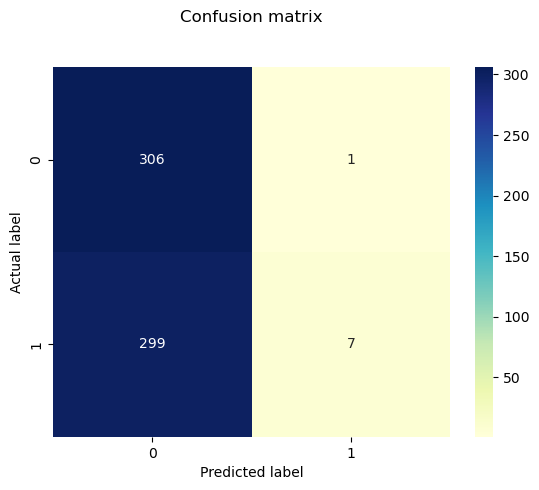

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_resampled_val, adb.predict(X_resampled_val_std))
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### over sampling

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 다시 train, test, val 세트 나누기
(
    X_resampled_train,
    X_resampled_val,
    X_resampled_test,
    y_resampled_train,
    y_resampled_val,
    y_resampled_test,
) = train_val_test_split(
    X_resampled, y_resampled, test_size=0.4, random_state=42, stratify=y_resampled
)

# 표준화 진행
sc = StandardScaler()
sc.fit(X_resampled_train)
X_resampled_train_std = sc.transform(X_resampled_train)
X_resampled_val_std = sc.transform(X_resampled_val)
X_resampled_test_std = sc.transform(X_resampled_test)

print("Oversampling 후 클래스 분포:", np.bincount(y_resampled_train))

Oversampling 후 클래스 분포: [4827 4827]


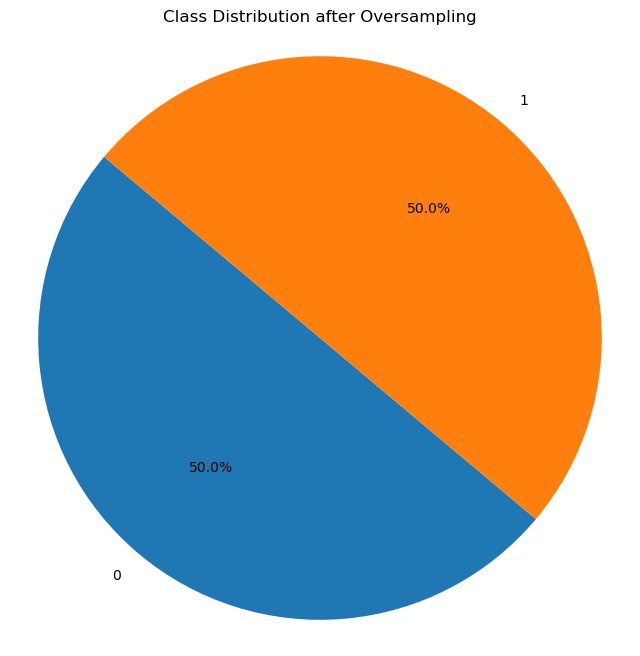

In [53]:
class_distribution = np.bincount(y_resampled_train)
labels = np.unique(y_resampled_train)
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Class Distribution after Oversampling')
plt.show()

가장 성능이 좋았던 Ada Boost모델로 over sampling 성능 확인

In [54]:
print('std Train Accuracy: %f' % accuracy_score(y_resampled_train, adb.predict(X_resampled_train_std)))
print('std Validation Accuracy: %f' % accuracy_score(y_resampled_val, adb.predict(X_resampled_val_std)))

std Train Accuracy: 0.501347
std Validation Accuracy: 0.503418


In [55]:
print('accuracy: %f' % accuracy_score(y_resampled_val, adb.predict(X_resampled_val_std)))
print('precision: %f' % precision_score(y_resampled_val, adb.predict(X_resampled_val_std)))
print('recall: %f' % recall_score(y_resampled_val, adb.predict(X_resampled_val_std)))
print('F1score: %f' % f1_score(y_resampled_val, adb.predict(X_resampled_val_std)))

accuracy: 0.503418
precision: 0.789474
recall: 0.009323
F1score: 0.018428


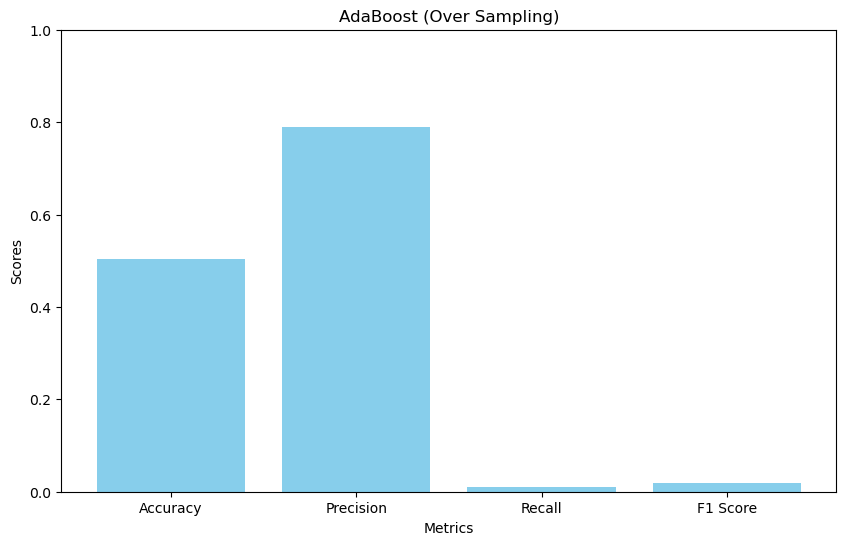

In [56]:
# 각 성능 지표 계산
accuracy = accuracy_score(y_resampled_val, adb.predict(X_resampled_val_std))
precision = precision_score(y_resampled_val, adb.predict(X_resampled_val_std))
recall = recall_score(y_resampled_val, adb.predict(X_resampled_val_std))
f1score = f1_score(y_resampled_val, adb.predict(X_resampled_val_std))

# 시각화를 위해 성능 지표와 이름을 리스트에 저장
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1score]

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('AdaBoost (Over Sampling)')
plt.ylim(0.0, 1.0)
plt.show()

Text(0.5, 23.52222222222222, 'Predicted label')

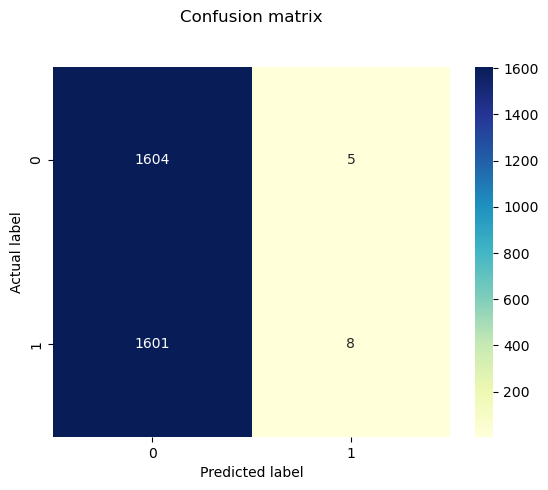

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_resampled_test, adb.predict(X_resampled_test_std))
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### 샘플링 했지만 성능이 매우 저조
#### why? imbanaced한 데이터를 훈련시킨 모델과 balanced한 데이터간의 괴리 발생
#### 데이터 분포가 달라졌기 때문에 다시 파라미터 최적화 과정을 거쳐야 함!

In [58]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = {
    "n_estimators": [100, 300, 500, 1000,],
    "learning_rate": [0.001, 0.01, 0.1],
}
ada = AdaBoostClassifier(algorithm="SAMME", random_state=42)
grid_search = GridSearchCV(
    estimator=ada,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="f1_macro",
    n_jobs=-1,
)
grid_search.fit(X_resampled_train, y_resampled_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# 테스트 세트로 모델 평가
y_pred = best_model.predict(X_resampled_val)
# F1-score 점수 계산
print("F1 score: ", f1_score(y_resampled_val, y_pred))

최적 하이퍼파라미터: {'learning_rate': 0.1, 'n_estimators': 1000}
최고 교차 검증 점수: 0.6724233656237683
F1 score:  0.6494389663379803


In [59]:
adb = best_model
print('accuracy: %f' % accuracy_score(y_resampled_val, adb.predict(X_resampled_val_std)))
print('precision: %f' % precision_score(y_resampled_val, adb.predict(X_resampled_val_std)))
print('recall: %f' % recall_score(y_resampled_val, adb.predict(X_resampled_val_std)))
print('F1score: %f' % f1_score(y_resampled_val, adb.predict(X_resampled_val_std)))

accuracy: 0.600062
precision: 0.750000
recall: 0.300186
F1score: 0.428762


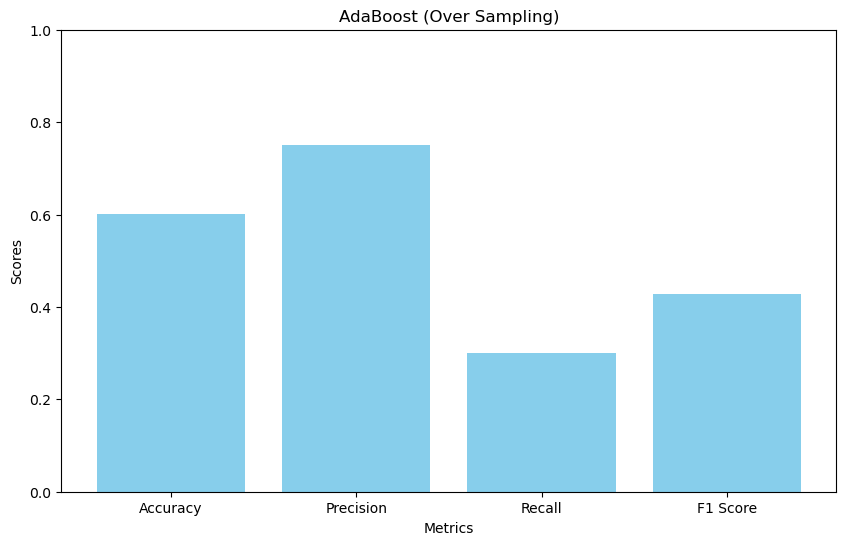

In [60]:
# 각 성능 지표 계산
accuracy = accuracy_score(y_resampled_val, adb.predict(X_resampled_val_std))
precision = precision_score(y_resampled_val, adb.predict(X_resampled_val_std))
recall = recall_score(y_resampled_val, adb.predict(X_resampled_val_std))
f1score = f1_score(y_resampled_val, adb.predict(X_resampled_val_std))

# 시각화를 위해 성능 지표와 이름을 리스트에 저장
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
scores = [accuracy, precision, recall, f1score]

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color="skyblue")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("AdaBoost (Over Sampling)")
plt.ylim(0.0, 1.0)
plt.show()

#### Recall, F1 score 지표 크게 상승 

## 11. 샘플링 과정시 유의점

위의 과정에서는 샘플링 -> 데이터 나누기(훈련,테스트) -> 표준화 -> 그리드 서치 의 순서대로 진행

하지만, 테스트 세트에는 샘플링을 진행하지 않는 것이 바람직

따라서, 샘플링 단계를 다시 진행

데이터 나누기 -> 표준화 -> 샘플링-> 그리드 서치 순서로 샘플링을 진행(adaBoost)

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled_train, y_resampled_train = smote.fit_resample(X_train_std, y_train)

print("Oversampling 후 클래스 분포:", np.bincount(y_resampled))

Oversampling 후 클래스 분포: [8045 8045]


### AdaBoost

In [62]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = {
    "n_estimators": [100, 300, 500, 1000,],
    "learning_rate": [0.001, 0.01, 0.1],
}
ada = AdaBoostClassifier(algorithm="SAMME",random_state=42)
grid_search = GridSearchCV(
    estimator=ada,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="f1_macro",
    n_jobs=-1,
)
grid_search.fit(X_resampled_train, y_resampled_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# 테스트 세트로 모델 평가
y_pred = best_model.predict(X_val_std)
# F1-score 점수 계산
print("F1 score: ", f1_score(y_test, y_pred))

최적 하이퍼파라미터: {'learning_rate': 0.1, 'n_estimators': 1000}
최고 교차 검증 점수: 0.7491791633479765
F1 score:  0.2078272604588394


In [63]:
ada = best_model
print(
    "std Train Accuracy: %f" % accuracy_score(y_resampled, ada.predict(X_resampled))
)
print("std Validation Accuracy: %f" % accuracy_score(y_val, ada.predict(X_val_std)))

print("accuracy: %f" % accuracy_score(y_val, ada.predict(X_val_std)))
print("precision: %f" % precision_score(y_val, ada.predict(X_val_std)))
print("recall: %f" % recall_score(y_val, ada.predict(X_val_std)))
print("F1score: %f" % f1_score(y_val, ada.predict(X_val_std)))

std Train Accuracy: 0.500000
std Validation Accuracy: 0.725470
accuracy: 0.725470
precision: 0.248276
recall: 0.351792
F1score: 0.291105


n_estimators만 조정해가면서 추가 그리드 서치 진행(이전 그리드 서치에서 n_estimators 최고값인 1000이 best로 계산되었음)

In [64]:
params = [1000,5000,10000,50000]
models = []
for param in params:
    model = AdaBoostClassifier(
        algorithm="SAMME", random_state=42, n_estimators=param, learning_rate=0.1
    )
    model.fit(X_resampled_train, y_resampled_train)
    models.append(model)

In [65]:
for model in models:
    print(f"accuracy: {accuracy_score(y_val, model.predict(X_val_std))}")
    print(f"precision: {precision_score(y_val, model.predict(X_val_std))}")
    print(f"recall: {recall_score(y_val, model.predict(X_val_std))}")
    print(f"F1score: {f1_score(y_val, model.predict(X_val_std))}")
    print()

accuracy: 0.7254697286012526
precision: 0.2482758620689655
recall: 0.3517915309446254
F1score: 0.29110512129380056

accuracy: 0.7604384133611691
precision: 0.28034682080924855
recall: 0.31596091205211724
F1score: 0.29709035222052066

accuracy: 0.7693110647181628
precision: 0.2948328267477204
recall: 0.31596091205211724
F1score: 0.3050314465408805

accuracy: 0.7839248434237995
precision: 0.30685920577617326
recall: 0.2768729641693811
F1score: 0.2910958904109589



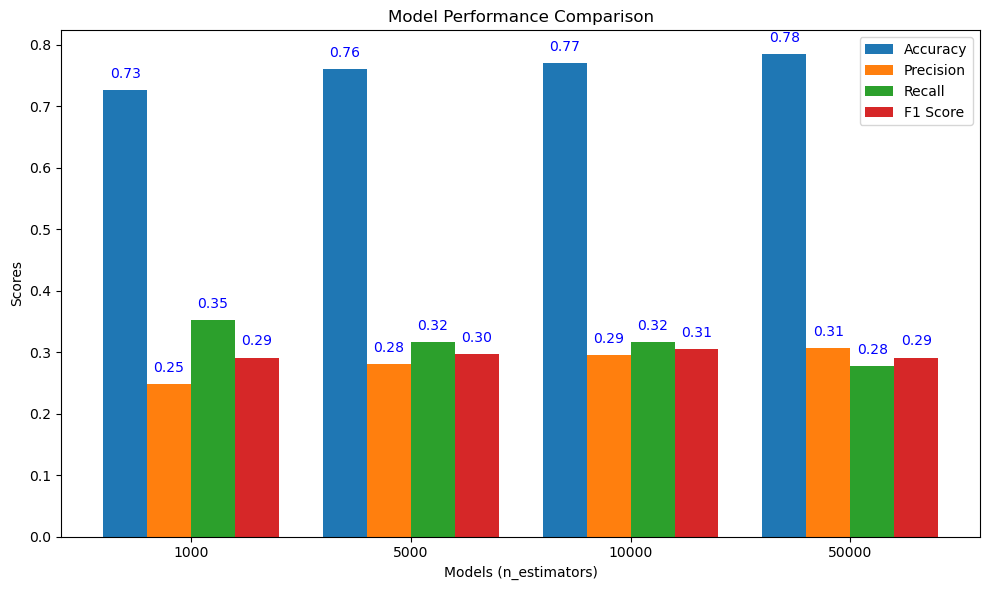

In [80]:
# 모델별 성능 지표를 저장할 딕셔너리 초기화
performance = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1score': []
}

# 각 모델에 대해 성능 지표를 계산하여 딕셔너리에 저장
for model in models:
    y_pred = model.predict(X_val_std)
    performance['accuracy'].append(accuracy_score(y_val, y_pred))
    performance['precision'].append(precision_score(y_val, y_pred, zero_division=1))
    performance['recall'].append(recall_score(y_val, y_pred, zero_division=1))
    performance['f1score'].append(f1_score(y_val, y_pred, zero_division=1))

# 성능 지표를 numpy 배열로 변환
performance = {k: np.array(v) for k, v in performance.items()}

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프를 겹쳐 그리기 위해 위치 설정
x = np.arange(len(params))
width = 0.2  # 막대의 너비

# 성능 지표 플롯
ax.bar(x - width*1.5, performance['accuracy'], width, label='Accuracy')
ax.bar(x - width/2, performance['precision'], width, label='Precision')
ax.bar(x + width/2, performance['recall'], width, label='Recall')
ax.bar(x + width*1.5, performance['f1score'], width, label='F1 Score')

# 제목과 레이블 설정
ax.set_xlabel('Models (n_estimators)')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(params)
ax.legend()

# 각 막대 위에 성능 지표 값을 표시
for i in range(len(params)):
    ax.text(x[i] - width*1.5, performance['accuracy'][i] + 0.02, f"{performance['accuracy'][i]:.2f}", ha='center', color='blue')
    ax.text(x[i] - width/2, performance['precision'][i] + 0.02, f"{performance['precision'][i]:.2f}", ha='center', color='blue')
    ax.text(x[i] + width/2, performance['recall'][i] + 0.02, f"{performance['recall'][i]:.2f}", ha='center', color='blue')
    ax.text(x[i] + width*1.5, performance['f1score'][i] + 0.02, f"{performance['f1score'][i]:.2f}", ha='center', color='blue')

plt.tight_layout()
plt.show()

#### 3번째 모델이 종합적으로 가장 좋은 지표를 보여줘서 가장 좋은 모델이라고 판단
#### 최종 모델로 결정!

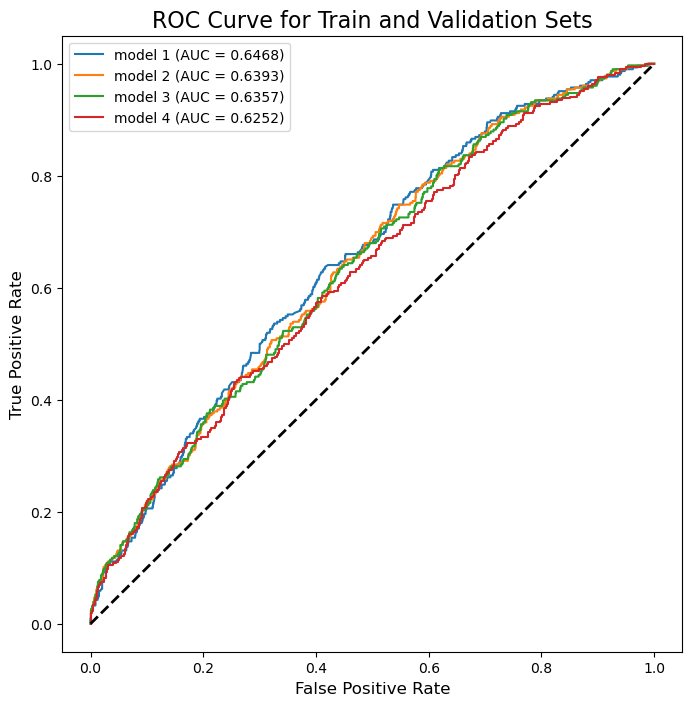

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 8))

for idx, model in enumerate(models):
    score = model.predict_proba(X_test_std)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, score)
    roc_auc = roc_auc_score(y_test, score)
    plt.plot(fpr, tpr, label=f"model {idx+1} (AUC = {roc_auc:.4f})")

# 대각선 (무작위 예측)
plt.plot([0, 1], [0, 1], "k--", lw=2)

plt.title("ROC Curve for Train and Validation Sets", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend()
plt.show()

**샘플링 하지않은 adaBoost 모델 vs 샘플링 진행한 adaBoost 모델(최종모델) 지표 비교**

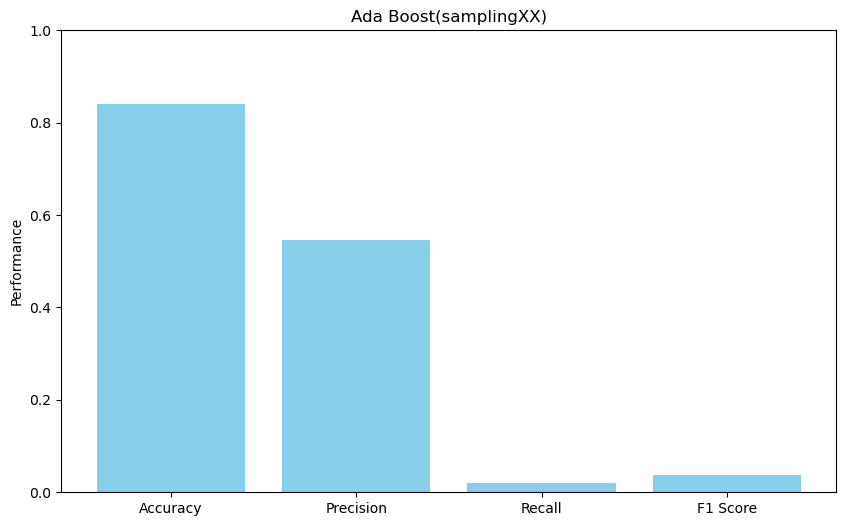

In [81]:
model = best_model_adb
y_pred = model.predict(X_val_std)

# 각 성능 지표를 저장
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1score = f1_score(y_val, y_pred)

# 성능 지표와 이름을 리스트에 저장
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
scores = [accuracy, precision, recall, f1score]

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color="skyblue")
plt.ylabel("Performance")
plt.title("Ada Boost(samplingXX)")
plt.ylim(0.0, 1.0)
plt.show()

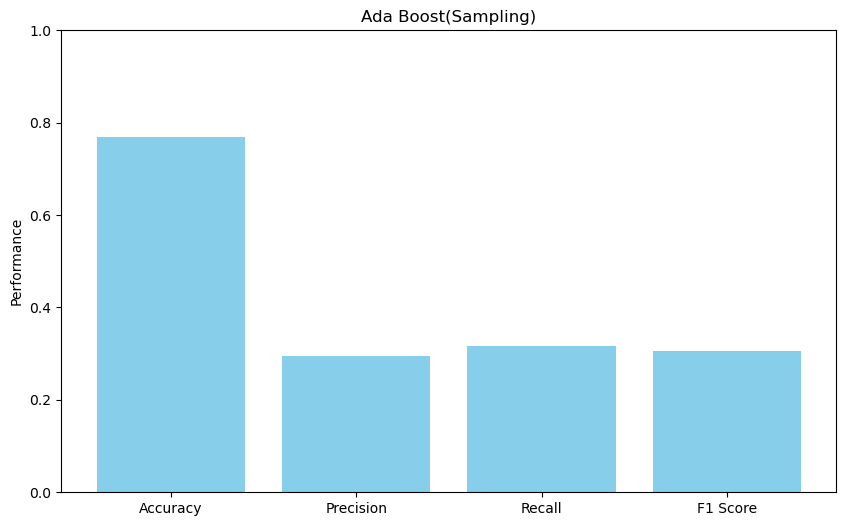

In [76]:
model = models[2]
y_pred = model.predict(X_val_std)

# 각 성능 지표를 저장
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1score = f1_score(y_val, y_pred)

# 성능 지표와 이름을 리스트에 저장
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
scores = [accuracy, precision, recall, f1score]

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color="skyblue")
plt.ylabel("Performance")
plt.title("Ada Boost(Sampling)")
plt.ylim(0.0, 1.0)
plt.show()

샘플링을 훈련세트에만 진행해보았더니 각종 평가 지표가 감소 함.

하지만, 샘플링 이전보다는 recall과 F1score이 증가 함.

정확도만이 중요한 지표가 아니기 때문에 샘플링 진행한 분류가 더 좋은 분류라고 판단.

### 최종 모델 Test Set 결과 확인

In [69]:
model = models[0]
y_pred = model.predict(X_test_std)

print("accuracy: %f" % accuracy_score(y_val, y_pred))
print("precision: %f" % precision_score(y_test, y_pred))
print("recall: %f" % recall_score(y_test, y_pred))
print("F1score: %f" % f1_score(y_test, y_pred))

accuracy: 0.695198
precision: 0.258581
recall: 0.369281
F1score: 0.304172


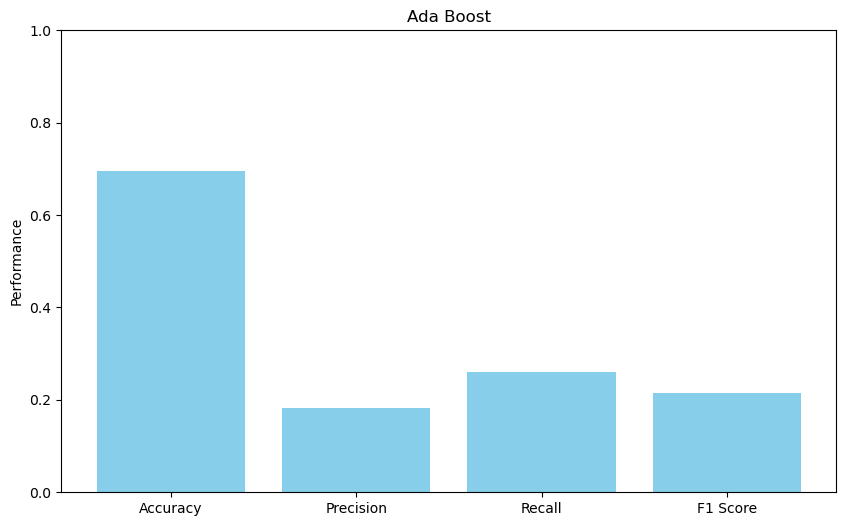

In [70]:
# 각 성능 지표를 저장
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1score = f1_score(y_val, y_pred)

# 성능 지표와 이름을 리스트에 저장
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
scores = [accuracy, precision, recall, f1score]

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color="skyblue")
plt.ylabel("Performance")
plt.title("Ada Boost")
plt.ylim(0.0, 1.0)
plt.show()

## 12. 결론

데이터셋 불러오기

분할 전 전처리(범주형 데이터 라벨링)

데이터 분할(훈련 / 검증 / 테스트)

분할 후 전처리 (표준화)

각각의 모델 최적화(그리드 서치)

평가지표(데이터 불균형 파악)

평가지표를 통한 개선 작업(샘플링)

샘플링 적용된 모델에 대해 다시 모델 최적화(그디드 서치)

올바른 샘플링 방법(훈련세트에만 샘플링 적용)

의 순서대로 프로젝트를 진행하였습니다.

### 느낀점


**이번 저희 프로젝트에서 배울 수 있었던 점은 평가 지표를 단순히 모델이 이정도의 성능을 보여주는 모델이다 정도의 해석에서 머무는 것이 아니라 평가 지표를 통해 모델의 학습 정도나 데이터 불균형을 파악하고 이를 개선하고자 노력했던 점 입니다.**

**프로젝트를 진행하며 산출되는 결과에 대해 단순히 받아들이는 것이 아닌 이를 해석해서 유의미한 인사이트를 얻어내고자 노력했습니다.**

**이것이 머신러닝 프로젝트를 바라보는 시야를 확장할 수 있었다고 생각합니다.**


**또한 전 학습 과정에서 테스트 세트의 오염에 대해 대처했던 점 입니다.**

**데이터 전처리 과정에서 분할 전 과 분할 후애 해야할 작업을 명확히 구분했던 점과 학습 과정에서 검증 데이터셋을 이용한 성능 평가, 데이터 샘플링 단계에서 훈련 데이터셋에만 적용하는 등으로 노력했습니다.**

**생각보다 실수하기 쉬운 부분이라 팀 프로젝트 과정에서 계속 체크하며 진행했습니다.**

### 아쉬운 점
**정밀도를 희생하지 않으면서 재현율을 확보할 수는 없었을까 입니다.** 

**만약 프로젝트를 더 진행하게 된다면 샘플링 이후 추가적으로 개선 가능한 부분을 고민해보고 싶습니다.**


**두 번째로 아쉬웠던 점 이상치 처리에 대한 부분입니다.**
**해당 데이터셋에서 이상치를 어떻게 정의할 것인가 혹은 어떻게 탐지할 것인지에 대해 기준을 세우기가 어려웠습니다.** 
**표준 편차와 같은 통계적인 기준으로 제거하거나 대체했을 때 오히려 성능이 감소했기 때문에 따로 이상치에 대해 처리하지 않았습니다.**